In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FixedLocator
from matplotlib.gridspec import GridSpec
import glob

from dust_extinction.dust import extinction_cal

In [2]:
%matplotlib notebook

In [9]:
yao_sample_dir = '../data/P48/SN2019yvq/data/Yao2019/data_fig11/'
ztf18_sne_files = glob.glob(yao_sample_dir + 'ZTF18*.dat')
salt_df = pd.read_csv(yao_sample_dir + '../Nobs_cut_salt2_spec_subtype_pec.csv')

In [38]:
abs_mag_df = pd.read_csv('abs_mag_p48.csv')
t_fl = -17.4928

In [5]:
color_dict = {1: 'MediumAquaMarine',
              2: 'Crimson', 
              3: 'Goldenrod', 
              "uvw2": "#D71DE5",
              "uvm2": "#008DCB",
              "uvw1": "#A4A4E3"}

mark_color_dict = {2: 'white',
                   1: 'MediumAquaMarine',
                   3: 'Goldenrod'}
sym_dict = {1: 'o',
            2: 'o',
            3: 'X'}
mec_dict = {2: 'Crimson',
            1: '0.5',
            3: '0.5'}
mew_dict = {2: 2,
            1: 0.5,
            3: 0.5}
filt_dict = {1:r'$g_\mathrm{ZTF}$', 
             2:r'$r_\mathrm{ZTF}$', 
             3:r'$i_\mathrm{ZTF}$'}
zorder_dict = {3: 10,
               1: 5,
               2: 2}

<IPython.core.display.Javascript object>


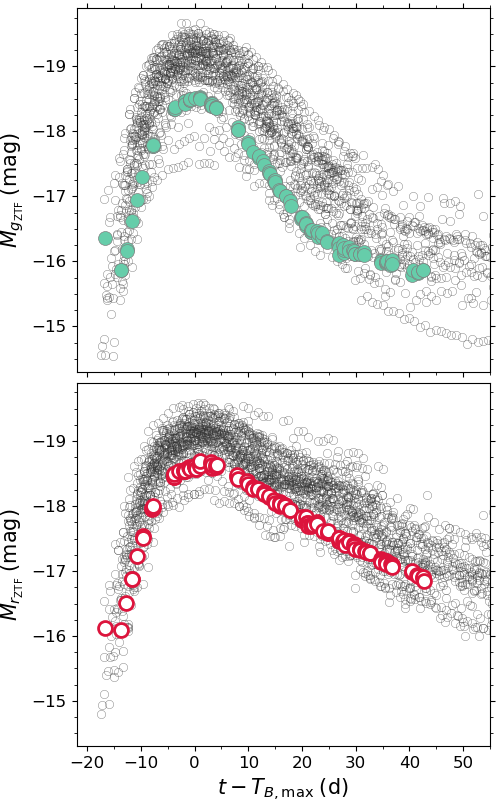

In [81]:
fig, (axg, axr) = plt.subplots(2, 1, figsize=(5,8))

for lcf in ztf18_sne_files:
    ztf_name = lcf.split('/')[-1].split('.')[0]
    this_sn = np.where(salt_df.name == ztf_name)
    if ((salt_df['z_source'].iloc[this_sn].values[0] == 'Msl') or 
        (salt_df['Ia subtype'].iloc[this_sn].values[0] in ['SC', 'SC*', 'Ia-CSM'])
       ):
        continue
    lc_df = pd.read_csv(lcf, delim_whitespace=True)
    
    g_obs = np.where((lc_df.fid == 1) & (lc_df.mag_unc < 0.2))
    r_obs = np.where((lc_df.fid == 2) & (lc_df.mag_unc < 0.2))
        
    axg.plot(lc_df.iloc[g_obs].t.values, 
             lc_df.iloc[g_obs].mag.values,
             'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)
    axr.plot(lc_df.iloc[r_obs].t.values, 
             lc_df.iloc[r_obs].mag.values,
             'o', color='None', mec='0.2', mew=0.3,  alpha=0.7)

g_obs = np.where(abs_mag_df.filt == 'g')
axg.plot(abs_mag_df.t_restframe.iloc[g_obs].values + t_fl, 
         abs_mag_df.abs_mag.iloc[g_obs].values, 
         sym_dict[1], color=mark_color_dict[1],
         mec=mec_dict[1], mew=mew_dict[1],
         zorder = zorder_dict[1], ms=10)
r_obs = np.where(abs_mag_df.filt == 'r')
axr.plot(abs_mag_df.t_restframe.iloc[r_obs].values + t_fl, 
         abs_mag_df.abs_mag.iloc[r_obs].values, 
         sym_dict[2], color=mark_color_dict[2], 
         mec=mec_dict[2], mew=mew_dict[2],
         zorder = zorder_dict[2], ms=10)

for ax in [axg, axr]:
    ax.set_xlim(-22, 55)
    ax.set_ylim(-14.3, -19.9)
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(0.25))
    
axg.tick_params(which='both', top=True, right=True, labelsize=12)
axr.tick_params(which='both', right=True, labelsize=12)
axg.set_xticklabels([])
axg.set_ylabel(r'$M_{g_\mathrm{ZTF}} \;(\mathrm{mag})$', fontsize=15)
axr.set_ylabel(r'$M_{r_\mathrm{ZTF}} \;(\mathrm{mag})$', fontsize=15)
axr.set_xlabel(r"$t - T_{B,\mathrm{max}} \; (\mathrm{d})$", fontsize=15)

fig.subplots_adjust(top=0.99, right=0.98, left=0.153, bottom=0.067, hspace=0.03)
fig.savefig('../paper/figures/abs_mag.pdf')

In [17]:
salt_df['Ia subtype'].iloc[np.where(salt_df.name == ztf_name)].values[0]

'normal'